In [1]:

import pandas as pd
# import nltk
# import spacy

# nltk.download("all")

In [2]:
# data importing
twitter_data=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Twitter_Sentiment/Twitter_Sentiment_Data.csv")
twitter_data.sample(5)

,tweet_ID,raw_tweet,sentiment_label
20645,aca9ad929e,_nyc hey sweetie. Cnt go fri but thnks so much,positive
18420,9fb6325db3,Aww I have a tummy ache,negative
13511,adef5df171,Oh no,neutral
4677,f93d61fe85,awww i missed it twitpic?,negative
15215,868b6bd015,I hadn`t realised how Long it had been since I...,neutral


In [3]:
# converting to lower case


# Using the .str accessor
twitter_data["tweet_lowcase"] = twitter_data["raw_tweet"].str.lower()
#twitter_data 

In [4]:

# # Identifying rows causing the error
# for idx, tweet in twitter_data["tweet_lowcase"].items():
#     try:
#         # Attempt to tokenize the tweet
#         tokens = word_tokenize(tweet)
#     except Exception as e:
#         # Print the index and the error
#         print(f"Error at index {idx}: {e}")
#         print(f"Problematic tweet: {tweet}")


In [5]:
import pandas as pd

# Assuming twitter_data is your DataFrame
twitter_data = twitter_data.drop(index=314)

# Alternatively, you can use the inplace parameter to modify the DataFrame directly
#twitter_data.drop(index=314, inplace=True)


In [6]:
# #tokenization

# import pandas as pd
# from nltk.tokenize import word_tokenize
# import nltk

# # instead of downloading all the files we will download when needed for saving memory 

# # Check if 'punkt' is already downloaded, if not, download it
# # try:
# #     nltk.data.find('tokenizers/punkt')
# # except LookupError:
# #nltk.download('punkt')


# # Apply the tokenization function to the 'tweet_lowcase' column
# twitter_data["word_tokens"] = twitter_data["tweet_lowcase"].apply(word_tokenize)

# # Display the DataFrame
# twitter_data[["raw_tweet","word_tokens"]].sample(10)


## expanding short form 

In [7]:
# expanding short form 


contra_Expan_Dict = {"ain`t": "am not","aren`t": "are not","can`t": "cannot","can`t`ve": "cannot have","`cause": "because",
"could`ve": "could have","couldn`t": "could not","couldn`t`ve": "could not have","didn`t": "did not",
"doesn`t": "does not","don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have","hasn`t": "has not",
"haven`t": "have not","he`d": "he would","he`d`ve": "he would have","he`ll": "he will","he`ll`ve": "he will have",
"he`s": "he is","how`d": "how did","how`d`y": "how do you","how`ll": "how will",
"how`s": "how does","i`d": "i would","i`d`ve": "i would have","i`ll": "i will","i`ll`ve": "i will have","i`m": "i am",
"i`ve": "i have","isn`t": "is not","it`d": "it would","it`d`ve": "it would have","it`ll": "it will","it`ll`ve": "it will have",
"it`s": "it is","let`s": "let us","ma`am": "madam","mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
"mightn`t`ve": "might not have","must`ve": "must have","mustn`t": "must not","mustn`t`ve": "must not have","needn`t": "need not","needn`t`ve": "need not have",
"o`clock": "of the clock","oughtn`t": "ought not","oughtn`t`ve": "ought not have","shan`t": "shall not",
"sha`n`t": "shall not","shan`t`ve": "shall not have","she`d": "she would",
"she`d`ve": "she would have","she`ll": "she will","she`ll`ve": "she will have",
"she`s": "she is","should`ve": "should have","shouldn`t": "should not","shouldn`t`ve": "should not have","so`ve": "so have","so`s": "so is",
"that`d": "that would","that`d`ve": "that would have","that`s": "that is","there`d": "there would","there`d`ve": "there would have","there`s": "there is",
"they`d": "they would","they`d`ve": "they would have","they`ll": "they will","they`ll`ve": "they will have","they`re": "they are","they`ve": "they have",
"to`ve": "to have","wasn`t": "was not"," u ": " you "," ur ": " your "," n ": " and ","won`t": "would not",
"dis": "this","bak": "back","brng": "bring"}

In [8]:
def expanded_form(x):
    if x in contra_Expan_Dict.keys():
        return contra_Expan_Dict[x].split()
    else:
        return x

def final_expanded_list(x):
    x_split = str(x).split()

    flat_list = []
    for t in x_split:
        intermediate = expanded_form(t)
        if isinstance(intermediate, list):
            flat_list.extend(intermediate)
        # If the element is not a list, append it to the flat_list
        else:
            flat_list.append(intermediate)

    return ' '.join(flat_list)

x = 'it`s don`t under a honeymoon by the good life'
result = final_expanded_list(x)
print(result)


it is do not under a honeymoon by the good life


In [9]:
#example how we are going to do it

x = str(' it`s under a honeymoon by the good life').split()

print("Expanded form ==>",[expanded_form(t) for t in x])


Expanded form ==> [['it', 'is'], 'under', 'a', 'honeymoon', 'by', 'the', 'good', 'life']


In [10]:
twitter_data["tweet_expanded"] = twitter_data["tweet_lowcase"].apply(final_expanded_list)
twitter_data.sample(10)


,tweet_ID,raw_tweet,sentiment_label,tweet_lowcase,tweet_expanded
1666,906dda88e4,"Smooches to you as well, have a great day!",positive,"smooches to you as well, have a great day!","smooches to you as well, have a great day!"
26894,3197e86219,The chicken noodle soup I made for lunch to fe...,negative,the chicken noodle soup i made for lunch to fe...,the chicken noodle soup i made for lunch to fe...
17518,008c725d0d,especially if you`re with a vampire,neutral,especially if you`re with a vampire,especially if you`re with a vampire
13722,7d3f92c5b5,"Going lay down, I`ll get up officially @ 1! Ye...",positive,"going lay down, i`ll get up officially @ 1! ye...","going lay down, i will get up officially @ 1! ..."
6251,eb4da39f39,why are plane tickets so expensive,negative,why are plane tickets so expensive,why are plane tickets so expensive
15855,a6c5ca1cc5,uhh I wish someone would include me in their f...,positive,uhh i wish someone would include me in their f...,uhh i wish someone would include me in their f...
15420,502880ec8b,this darn cold just keeps getting worse i bou...,negative,this darn cold just keeps getting worse i bou...,this darn cold just keeps getting worse i boug...
20145,03180131ed,is now going to see his very ill uncle on satu...,negative,is now going to see his very ill uncle on satu...,is now going to see his very ill uncle on satu...
15377,9cfa9342c1,i don`t like to see you like this... there m...,negative,i don`t like to see you like this... there m...,i do not like to see you like this... there mu...
26572,c6388a7dd0,Then I guess that makes me Dot?,neutral,then i guess that makes me dot?,then i guess that makes me dot?


## removing punctuation

In [11]:
# import re
# # Function to remove punctuation
# def remove_punctuation(text):
#     return re.sub(r'[^\w\s]', '', text)

# # Function to remove special characters
# def remove_special_characters(text):
#     return re.sub(r'[^A-Za-z0-9\s]', '', text)

# # Function to remove hyperlinks
# def remove_hyperlinks(text):
#     return re.sub(r'https?://\S+', '', text)
    
# twitter_data['cleaned_text'] = twitter_data['tweet_expanded'].apply(remove_hyperlinks)
# twitter_data['cleaned_text'] = twitter_data['cleaned_text'].apply(remove_punctuation)
# twitter_data['cleaned_text'] = twitter_data['cleaned_text'].apply(remove_special_characters)


# twitter_data.sample(10)

In [12]:
import re

# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Function to remove special characters and numbers
def remove_special_characters_and_numbers(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Function to remove hyperlinks
def remove_hyperlinks(text):
    return re.sub(r'https?://\S+', '', text)

# Assuming twitter_data is a pandas DataFrame and 'tweet_expanded' is the column containing the tweets
twitter_data['cleaned_text'] = twitter_data['tweet_expanded'].apply(remove_hyperlinks)
twitter_data['cleaned_text'] = twitter_data['cleaned_text'].apply(remove_punctuation)
twitter_data['cleaned_text'] = twitter_data['cleaned_text'].apply(remove_special_characters_and_numbers)

# Display a sample of the cleaned data
twitter_data.sample(10)


,tweet_ID,raw_tweet,sentiment_label,tweet_lowcase,tweet_expanded,cleaned_text
23192,7100d525ab,I don`t find this stuff amusing any more,negative,i don`t find this stuff amusing any more,i do not find this stuff amusing any more,i do not find this stuff amusing any more
2051,f2fd79de98,pandora is blocked at my work bummed,negative,pandora is blocked at my work bummed,pandora is blocked at my work bummed,pandora is blocked at my work bummed
1357,216703ba65,WOW.How sweet!,positive,wow.how sweet!,wow.how sweet!,wowhow sweet
6336,85a1bc359b,"Home. Should be in the bed, but I`m just super...",positive,"home. should be in the bed, but i`m just super...","home. should be in the bed, but i am just supe...",home should be in the bed but i am just super ...
18736,f82fc1a0f6,because he _real_nash wants to be an honorary ...,positive,because he _real_nash wants to be an honorary ...,because he _real_nash wants to be an honorary ...,because he realnash wants to be an honorary fi...
17619,de05715142,I can`t sleep... And now????,neutral,i can`t sleep... and now????,i cannot sleep... and now????,i cannot sleep and now
15443,83a487db96,I accidently dropped it & now the screen is a...,negative,i accidently dropped it & now the screen is a...,i accidently dropped it & now the screen is al...,i accidently dropped it now the screen is all...
23944,cc6e242e88,you`re very welcome! I love reviewing free ap...,positive,you`re very welcome! i love reviewing free ap...,you`re very welcome! i love reviewing free app...,youre very welcome i love reviewing free apps ...
14629,ad9861c440,"hey life, i love you! (translation: i love l...",positive,"hey life, i love you! (translation: i love l...","hey life, i love you! (translation: i love life!)",hey life i love you translation i love life
4799,daa5b8c7f3,"going to work at one sucks, I miss happy hour ...",negative,"going to work at one sucks, i miss happy hour ...","going to work at one sucks, i miss happy hour ...",going to work at one sucks i miss happy hour a...


## tokenization

In [13]:
#tokenization

import pandas as pd
from nltk.tokenize import word_tokenize
import nltk

# instead of downloading all the files we will download when needed for saving memory 

# Check if 'punkt' is already downloaded, if not, download it
# try:
#     nltk.data.find('tokenizers/punkt')
# except LookupError:
#nltk.download('punkt')


# Apply the tokenization function to the 'tweet_lowcase' column
twitter_data["word_tokens"] = twitter_data["cleaned_text"].apply(word_tokenize)

# Display the DataFrame
twitter_data.sample(5)

,tweet_ID,raw_tweet,sentiment_label,tweet_lowcase,tweet_expanded,cleaned_text,word_tokens
26631,ad4668fb0e,"Lol. Thanks, Penny. I`m trying to believe you.",positive,"lol. thanks, penny. i`m trying to believe you.","lol. thanks, penny. i am trying to believe you.",lol thanks penny i am trying to believe you,"[lol, thanks, penny, i, am, trying, to, believ..."
16108,72b1bac82c,Get into me not going. lol at least I didnt ge...,negative,get into me not going. lol at least i didnt ge...,get into me not going. lol at least i didnt ge...,get into me not going lol at least i didnt get...,"[get, into, me, not, going, lol, at, least, i,..."
4074,146c706c22,"well,only one week left of my holidays,sad sad",negative,"well,only one week left of my holidays,sad sad","well,only one week left of my holidays,sad sad",wellonly one week left of my holidayssad sad,"[wellonly, one, week, left, of, my, holidayssa..."
21748,ed330f9c42,", just dont understand what`s it got to do wi...",neutral,", just dont understand what`s it got to do wi...",", just dont understand what`s it got to do wit...",just dont understand whats it got to do with ...,"[just, dont, understand, whats, it, got, to, d..."
15296,b5cb96708a,in rye..happy mothers day mums ily mummy lol,positive,in rye..happy mothers day mums ily mummy lol,in rye..happy mothers day mums ily mummy lol,in ryehappy mothers day mums ily mummy lol,"[in, ryehappy, mothers, day, mums, ily, mummy,..."


In [14]:
twitter_data.iloc[12390]

tweet_ID                                                  c977126a61
raw_tweet             I hate it when that happens!! Exciting though.
sentiment_label                                              neutral
tweet_lowcase         i hate it when that happens!! exciting though.
tweet_expanded        i hate it when that happens!! exciting though.
cleaned_text             i hate it when that happens exciting though
word_tokens        [i, hate, it, when, that, happens, exciting, t...
Name: 12391, dtype: object

## removing stop words

In [15]:
# stopwords from nltk

from nltk.corpus import stopwords
import nltk

#nltk.download('stopwords')

nltk_stop_words = set(stopwords.words('english')) ##Selecting the stop words from the Language
print("Number of Stop words in NLTK ==>", len(nltk_stop_words))
print(sorted(nltk_stop_words))

Number of Stop words in NLTK ==> 179
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 

In [16]:
# stop words from spacy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
print("Number of Stop words in spaCy ==>", len(spacy_stopwords))
print(sorted(spacy_stopwords))
#Spacy stopwords list looks better.

Number of Stop words in spaCy ==> 326
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'ha

In [17]:
x= twitter_data["word_tokens"][6207]
print(x)
[t for t in x if t not in spacy_stopwords ]

['it', 'is', 'under', 'a', 'honeymoon', 'by', 'the', 'good', 'life']


['honeymoon', 'good', 'life']

In [18]:
twitter_data["After_Removing_Stopwords"] = twitter_data["word_tokens"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
twitter_data.sample(10)

,tweet_ID,raw_tweet,sentiment_label,tweet_lowcase,tweet_expanded,cleaned_text,word_tokens,After_Removing_Stopwords
22813,500409b101,I love your tweets... Your sweet,positive,i love your tweets... your sweet,i love your tweets... your sweet,i love your tweets your sweet,"[i, love, your, tweets, your, sweet]","[love, tweets, sweet]"
20450,21c4406bdb,"nothing, they make it up, last time i checked...",negative,"nothing, they make it up, last time i checked...","nothing, they make it up, last time i checked ...",nothing they make it up last time i checked a ...,"[nothing, they, make, it, up, last, time, i, c...","[time, checked, jar, curry, sauce, pepper, ins..."
13831,2.62E+21,"happy mothers day to all the mothers, grandmot...",positive,"happy mothers day to all the mothers, grandmot...","happy mothers day to all the mothers, grandmot...",happy mothers day to all the mothers grandmoth...,"[happy, mothers, day, to, all, the, mothers, g...","[happy, mothers, day, mothers, grandmothers, f..."
9184,cbc9125150,i hate feeling like this,negative,i hate feeling like this,i hate feeling like this,i hate feeling like this,"[i, hate, feeling, like, this]","[hate, feeling, like]"
24970,0f18c42884,"you and the guys should come down here, we ar...",negative,"you and the guys should come down here, we ar...","you and the guys should come down here, we are...",you and the guys should come down here we are ...,"[you, and, the, guys, should, come, down, here...","[guys, come, freezing]"
4296,8c206e1984,why am I weird?,negative,why am i weird?,why am i weird?,why am i weird,"[why, am, i, weird]",[weird]
6505,0903386a1d,not at my workplace. but a short-sleeved sh...,neutral,not at my workplace. but a short-sleeved sh...,not at my workplace. but a short-sleeved shirt...,not at my workplace but a shortsleeved shirt i...,"[not, at, my, workplace, but, a, shortsleeved,...","[workplace, shortsleeved, shirt, absolutely, n..."
24741,c17807c0fe,dude... Can you really be a bachelor at this ...,positive,dude... can you really be a bachelor at this ...,dude... can you really be a bachelor at this p...,dude can you really be a bachelor at this poin...,"[dude, can, you, really, be, a, bachelor, at, ...","[dude, bachelor, point, worry]"
8789,51129d1eec,i would like some macaroni and cheese please.....,neutral,i would like some macaroni and cheese please.....,i would like some macaroni and cheese please.....,i would like some macaroni and cheese pleaseno,"[i, would, like, some, macaroni, and, cheese, ...","[like, macaroni, cheese, pleaseno]"
10559,1742c433ec,piecing a photo quilt for Boeing employees to ...,negative,piecing a photo quilt for boeing employees to ...,piecing a photo quilt for boeing employees to ...,piecing a photo quilt for boeing employees to ...,"[piecing, a, photo, quilt, for, boeing, employ...","[piecing, photo, quilt, boeing, employees, hun..."


In [19]:
# how to add new stopwords
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords

spacy_stopwords.update(["would", "rt","like", "ha", "lol", "need", "do"])
print("New Number of Stop words in spaCy ==>", len(spacy_stopwords))
#print(sorted(spacy_stopwords))

New Number of Stop words in spaCy ==> 331


In [20]:
# again running the code of removing stopwords
twitter_data["After_Removing_Stopwords"] = twitter_data["word_tokens"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
twitter_data.sample(10)

,tweet_ID,raw_tweet,sentiment_label,tweet_lowcase,tweet_expanded,cleaned_text,word_tokens,After_Removing_Stopwords
4178,19bb515fd0,haha nice to know I`m not alone! Working in t...,positive,haha nice to know i`m not alone! working in t...,haha nice to know i am not alone! working in t...,haha nice to know i am not alone working in th...,"[haha, nice, to, know, i, am, not, alone, work...","[haha, nice, know, working, bbc]"
26282,1f22867b36,"if you like those cookies, you are going to L...",positive,"if you like those cookies, you are going to l...","if you like those cookies, you are going to lo...",if you like those cookies you are going to lov...,"[if, you, like, those, cookies, you, are, goin...","[cookies, going, love, cookies, lars, tetens, ..."
1399,0e8144aa34,"facebook quizzes are one cure of boredom haha,...",positive,"facebook quizzes are one cure of boredom haha,...","facebook quizzes are one cure of boredom haha,...",facebook quizzes are one cure of boredom haha ...,"[facebook, quizzes, are, one, cure, of, boredo...","[facebook, quizzes, cure, boredom, haha, teeth..."
24273,aa8020f349,Don`t tease me! I`m in desperate need of an a...,negative,don`t tease me! i`m in desperate need of an a...,do not tease me! i am in desperate need of an ...,do not tease me i am in desperate need of an a...,"[do, not, tease, me, i, am, in, desperate, nee...","[tease, desperate, adjustment]"
6388,312cd9c009,pretty tired after a nice full day.,positive,pretty tired after a nice full day.,pretty tired after a nice full day.,pretty tired after a nice full day,"[pretty, tired, after, a, nice, full, day]","[pretty, tired, nice, day]"
7314,0236099d7d,unfortunatley it is the tooth kind of crown,negative,unfortunatley it is the tooth kind of crown,unfortunatley it is the tooth kind of crown,unfortunatley it is the tooth kind of crown,"[unfortunatley, it, is, the, tooth, kind, of, ...","[unfortunatley, tooth, kind, crown]"
7253,357c98b5bc,Goddamn bloody stress and **** sending my body...,negative,goddamn bloody stress and **** sending my body...,goddamn bloody stress and **** sending my body...,goddamn bloody stress and sending my body hay...,"[goddamn, bloody, stress, and, sending, my, bo...","[goddamn, bloody, stress, sending, body, haywire]"
20746,d2d487b0e9,haha. Hope U have a Great Laugh as Laughter i...,positive,haha. hope u have a great laugh as laughter i...,haha. hope u have a great laugh as laughter is...,haha hope u have a great laugh as laughter is ...,"[haha, hope, u, have, a, great, laugh, as, lau...","[haha, hope, u, great, laugh, laughter, best, ..."
25003,a962fad818,On the plane to yosemite. Forgot my laptop at ...,neutral,on the plane to yosemite. forgot my laptop at ...,on the plane to yosemite. forgot my laptop at ...,on the plane to yosemite forgot my laptop at home,"[on, the, plane, to, yosemite, forgot, my, lap...","[plane, yosemite, forgot, laptop, home]"
23039,136ccb49bf,nope i`m bored and hungry.,negative,nope i`m bored and hungry.,nope i am bored and hungry.,nope i am bored and hungry,"[nope, i, am, bored, and, hungry]","[nope, bored, hungry]"


In [21]:
twitter_data.iloc[10871]

tweet_ID                                                           e4165fd406
raw_tweet                   http://twitpic.com/4wt8a - pretty **** good fr...
sentiment_label                                                      positive
tweet_lowcase               http://twitpic.com/4wt8a - pretty **** good fr...
tweet_expanded              http://twitpic.com/4wt8a - pretty **** good fr...
cleaned_text                                        pretty  good friday night
word_tokens                                     [pretty, good, friday, night]
After_Removing_Stopwords                        [pretty, good, friday, night]
Name: 10872, dtype: object

## lematization 

### examples of lematization 

In [22]:
# example of lematization usign spacy with list entry 
import pandas as pd
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Sample DataFrame
data = {'text': [['going', 'good', 'friday', 'night'], ['running', 'bad', 'saturday', 'day']]}
df = pd.DataFrame(data)

# Function to lemmatize a list of words using spaCy
def lemmatize_list(word_list):
    lemmatized_list = []
    for word in word_list:
        doc = nlp(word)
        lemmatized_list.append(doc[0].lemma_)
    return lemmatized_list

# Apply lemmatization to each list in the DataFrame
df['lemmatized_text'] = df['text'].apply(lemmatize_list)

print(df)


                            text            lemmatized_text
0   [going, good, friday, night]  [go, good, friday, night]
1  [running, bad, saturday, day]  [run, bad, saturday, day]


In [23]:
# example of lematization usign spacy with sentence entry 

import pandas as pd
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Sample DataFrame
data = {'text': ['today going home', 'yesterday running quickly']}
df = pd.DataFrame(data)

# Function to lemmatize a sentence using spaCy
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    return ' '.join([token.lemma_ for token in doc])

# Apply lemmatization to each sentence in the DataFrame
df['lemmatized_text'] = df['text'].apply(lemmatize_sentence)

print(df)


                        text        lemmatized_text
0           today going home          today go home
1  yesterday running quickly  yesterday run quickly


In [24]:
for i, token in enumerate(nlp('going')):
    print(i,token)

0 going


### data frame lemmatization 

In [25]:

#twitter_data["After_Removing_Stopwords"] = twitter_data["After_Removing_Stopwords"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


twitter_data["Pre_final_text"] = twitter_data["After_Removing_Stopwords"].apply(lambda x: ' '.join(x))

twitter_data["Final_text"] = twitter_data["Pre_final_text"].apply(lemmatize_sentence)
twitter_data.sample(10)

,tweet_ID,raw_tweet,sentiment_label,tweet_lowcase,tweet_expanded,cleaned_text,word_tokens,After_Removing_Stopwords,Pre_final_text,Final_text
11928,7f91178253,Or nudge the partner! Good birthday/ christma...,positive,or nudge the partner! good birthday/ christma...,or nudge the partner! good birthday/ christmas...,or nudge the partner good birthday christmas i...,"[or, nudge, the, partner, good, birthday, chri...","[nudge, partner, good, birthday, christmas, wa...",nudge partner good birthday christmas want buy...,nudge partner good birthday christmas want buy...
11286,96204d3a64,thank you very much!!!,positive,thank you very much!!!,thank you very much!!!,thank you very much,"[thank, you, very, much]",[thank],thank,thank
23024,8630921b7f,"jus woke up, late runnin to work have student...",neutral,"jus woke up, late runnin to work have student...","jus woke up, late runnin to work have students...",jus woke up late runnin to work have students ...,"[jus, woke, up, late, runnin, to, work, have, ...","[jus, woke, late, runnin, work, students, train]",jus woke late runnin work students train,jus wake late runnin work student train
25598,a61f4c5f63,Yes please and check out your position on the...,positive,yes please and check out your position on the...,yes please and check out your position on the ...,yes please and check out your position on the ...,"[yes, please, and, check, out, your, position,...","[yes, check, position, locations, map, added]",yes check position locations map added,yes check position location map add
5882,10030773a0,Hi Its not about howmany people follow you it...,neutral,hi its not about howmany people follow you it...,hi its not about howmany people follow you its...,hi its not about howmany people follow you its...,"[hi, its, not, about, howmany, people, follow,...","[hi, howmany, people, follow, help]",hi howmany people follow help,hi howmany people follow help
14483,f19a15c924,Back to reality... boo,negative,back to reality... boo,back to reality... boo,back to reality boo,"[back, to, reality, boo]","[reality, boo]",reality boo,reality boo
1063,b66503f26a,has just discovered a great site!,positive,has just discovered a great site!,has just discovered a great site!,has just discovered a great site,"[has, just, discovered, a, great, site]","[discovered, great, site]",discovered great site,discover great site
24665,2ddebbe71b,"ate ****, I refuse to bless her cuz she alrea...",negative,"ate ****, i refuse to bless her cuz she alrea...","ate ****, i refuse to bless her cuz she alread...",ate i refuse to bless her cuz she already clingy,"[ate, i, refuse, to, bless, her, cuz, she, alr...","[ate, refuse, bless, cuz, clingy]",ate refuse bless cuz clingy,eat refuse bless cuz clingy
11843,04c563f43b,i was screaming like a maniac! But the thing ...,negative,i was screaming like a maniac! but the thing ...,i was screaming like a maniac! but the thing w...,i was screaming like a maniac but the thing wa...,"[i, was, screaming, like, a, maniac, but, the,...","[screaming, maniac, thing, u, scream, ride, su...",screaming maniac thing u scream ride sucked fun,scream maniac thing u scream ride suck fun
19910,6fd2aff430,will just take a bath,neutral,will just take a bath,will just take a bath,will just take a bath,"[will, just, take, a, bath]",[bath],bath,bath


In [26]:
#contains emoji or not 
import re

def contains_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

# Example usage with a DataFrame
import pandas as pd

twitter_data["raw_tweet"].apply(contains_emoji).unique()


array([False])

## Generate word cloud

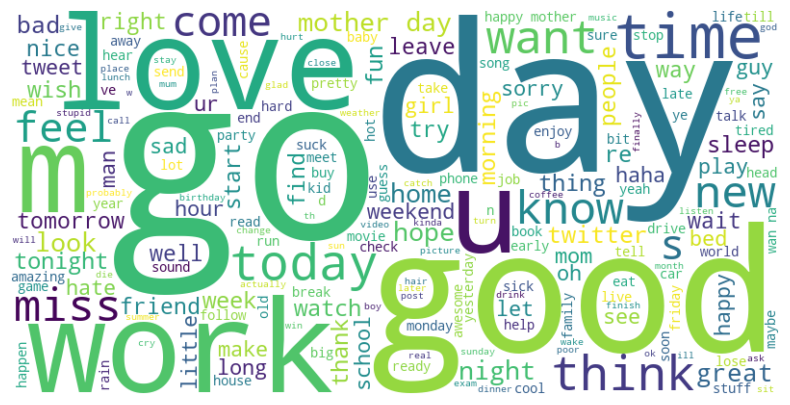

In [27]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

for_word_cloud="".join(twitter_data["Final_text"])



# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(for_word_cloud)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [42]:
dtm_intermidiate = twitter_data
dtm_intermidiate  = dtm_intermidiate[twitter_data['sentiment_label'] != 'neutral'] 


## Document Term matrix

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer instance
vectorizer = CountVectorizer(min_df =2)


# Fit and transform the preprocessed documents
dtm = vectorizer.fit_transform(dtm_intermidiate["Final_text"])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Create the DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=terms)

# Display the DataFrame
dtm_df.head()

,aaaah,aaahhh,aaawww,aah,aargh,aaron,abandon,abc,abide,ability,...,zack,ze,zealand,zero,zoe,zombie,zone,zoo,zs,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Sentiment analysis

In [57]:
y = twitter_data['sentiment_label']


In [58]:
# dtm_df['sentiment_label']=twitter_data['sentiment_label']

# # Remove rows with 'neutral' sentiment labels
# dtm_df_neutral_removed = dtm_df[dtm_df['sentiment_label'] != 'neutral']

# # Remove rows with missing values in the 'sentiment_label' column
# dtm_df_neutral_removed = dtm_df_neutral_removed.dropna(subset=['sentiment_label'])


# # Check the value counts after removing 'neutral' labels and missing values
# print(dtm_df_neutral_removed['sentiment_label'].value_counts())


In [59]:
# Remove rows with 'neutral' sentiment labels
y_neutral_removed = y[y != 'neutral']

# Remove rows with missing values in the 'sentiment_label' column
#y_neutral_removed = y_neutral_removed.dropna()

# Check the value counts after removing 'neutral' labels and missing values
print(y_neutral_removed.value_counts())


sentiment_label
positive    8582
negative    7781
Name: count, dtype: int64


### label encoding 


In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = y_neutral_removed
y_encoded = le.fit_transform(y)
label_encoder = le


In [61]:
classes = label_encoder.classes_
labels_mapping = {class_: i for i, class_ in enumerate(classes)}
print(labels_mapping)

{'negative': 0, 'positive': 1}


### trian test split 


In [62]:
from sklearn.model_selection import train_test_split

X = dtm_df

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2 , random_state=42)



### Naive Bayes Model 

In [63]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
senti_model = MultinomialNB()

#Fitting model to our data
senti_model.fit(X_train, y_train)
senti_pred = senti_model.predict(X_test)

print(classification_report(y_test, senti_pred))


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1603
           1       0.85      0.86      0.85      1670

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



In [64]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Predictions on the training set
train_predict = senti_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_predict)
train_accuracy = np.sum(np.diag(train_cm)) / np.sum(train_cm)
print("Training Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Predictions on the test set
test_predict = senti_model.predict(X_test)
test_cm = confusion_matrix(y_test, test_predict)
test_accuracy = np.sum(np.diag(test_cm)) / np.sum(test_cm)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", test_accuracy)



Training Set Confusion Matrix:
[[5521  657]
 [ 574 6338]]
Training Set Accuracy: 0.9059587471352177

Test Set Confusion Matrix:
[[1343  260]
 [ 234 1436]]
Test Set Accuracy: 0.8490681332111213


In [65]:
print("Train Accuracy", senti_model.score(X_train,y_train))
print("Test Accuracy", senti_model.score(X_test,y_test))

Train Accuracy 0.9059587471352177
Test Accuracy 0.8490681332111213


In [66]:
import os
current_directory = os.getcwd()
print("Current Directory:", current_directory)


Current Directory: C:\Users\annun\Documents\programes\OJT


In [67]:
import joblib

# Save the vectorizer
joblib.dump(vectorizer, r'C:\Users\annun\Documents\programes\OJT\vectorizer.pkl')


# Save the model
joblib.dump(senti_model, r'C:\Users\annun\Documents\programes\OJT\senti_model.pkl')



['C:\\Users\\annun\\Documents\\programes\\OJT\\senti_model.pkl']

In [68]:


# New sentences
t1 = "Awesome experience. Go for it. It is a great place"
t2 = "Very bad day for me today. I would like to forget it as soon as possible"
tweet_list = [t1, t2]

# Create a DataFrame with the new tweets
new_comment = pd.DataFrame({"text": tweet_list})

# Apply preprocessing steps
new_comment["new_comment_lowcase"] = new_comment["text"].str.lower()
new_comment["new_comment_expanded"] = new_comment["new_comment_lowcase"].apply(final_expanded_list)
new_comment['cleaned_text'] = new_comment['new_comment_expanded'].apply(remove_hyperlinks)
new_comment['cleaned_text'] = new_comment['cleaned_text'].apply(remove_punctuation)
new_comment['cleaned_text'] = new_comment['cleaned_text'].apply(remove_special_characters_and_numbers)
new_comment["word_tokens"] = new_comment["cleaned_text"].apply(word_tokenize)
new_comment["After_Removing_Stopwords"] = new_comment["word_tokens"].apply(lambda x: [t for t in x if t not in spacy_stopwords])
new_comment["Pre_final_text"] = new_comment["After_Removing_Stopwords"].apply(lambda x: ' '.join(x))
new_comment["Final_text"] = new_comment["Pre_final_text"].apply(lemmatize_sentence)

# Display preprocessed text
new_comment


,text,new_comment_lowcase,new_comment_expanded,cleaned_text,word_tokens,After_Removing_Stopwords,Pre_final_text,Final_text
0,Awesome experience. Go for it. It is a great p...,awesome experience. go for it. it is a great p...,awesome experience. go for it. it is a great p...,awesome experience go for it it is a great place,"[awesome, experience, go, for, it, it, is, a, ...","[awesome, experience, great, place]",awesome experience great place,awesome experience great place
1,Very bad day for me today. I would like to for...,very bad day for me today. i would like to for...,very bad day for me today. i would like to for...,very bad day for me today i would like to forg...,"[very, bad, day, for, me, today, i, would, lik...","[bad, day, today, forget, soon, possible]",bad day today forget soon possible,bad day today forget soon possible


In [69]:
import joblib
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Load the pre-trained vectorizer and model
vectorizer = joblib.load('vectorizer.pkl')
senti_model = joblib.load('senti_model.pkl')

# Transform the preprocessed text data into a Document-Term Matrix (DTM)
dtm_new_comment = vectorizer.transform(new_comment["text"])

# Predict sentiment using the trained model
predicted_sentiment = senti_model.predict(dtm_new_comment)

# Print the predicted sentiment for each text
for text, label in zip(new_comment["text"], predicted_sentiment):
    print(f"Text: {text}\nPredicted Sentiment: {label}")


Text: Awesome experience. Go for it. It is a great place
Predicted Sentiment: 1
Text: Very bad day for me today. I would like to forget it as soon as possible
Predicted Sentiment: 0


C:\Users\annun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
